### Quantum Fourier Transform Algorithm

In [1]:
from math import floor
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import quantum_info
from qiskit.circuit.library import QFT

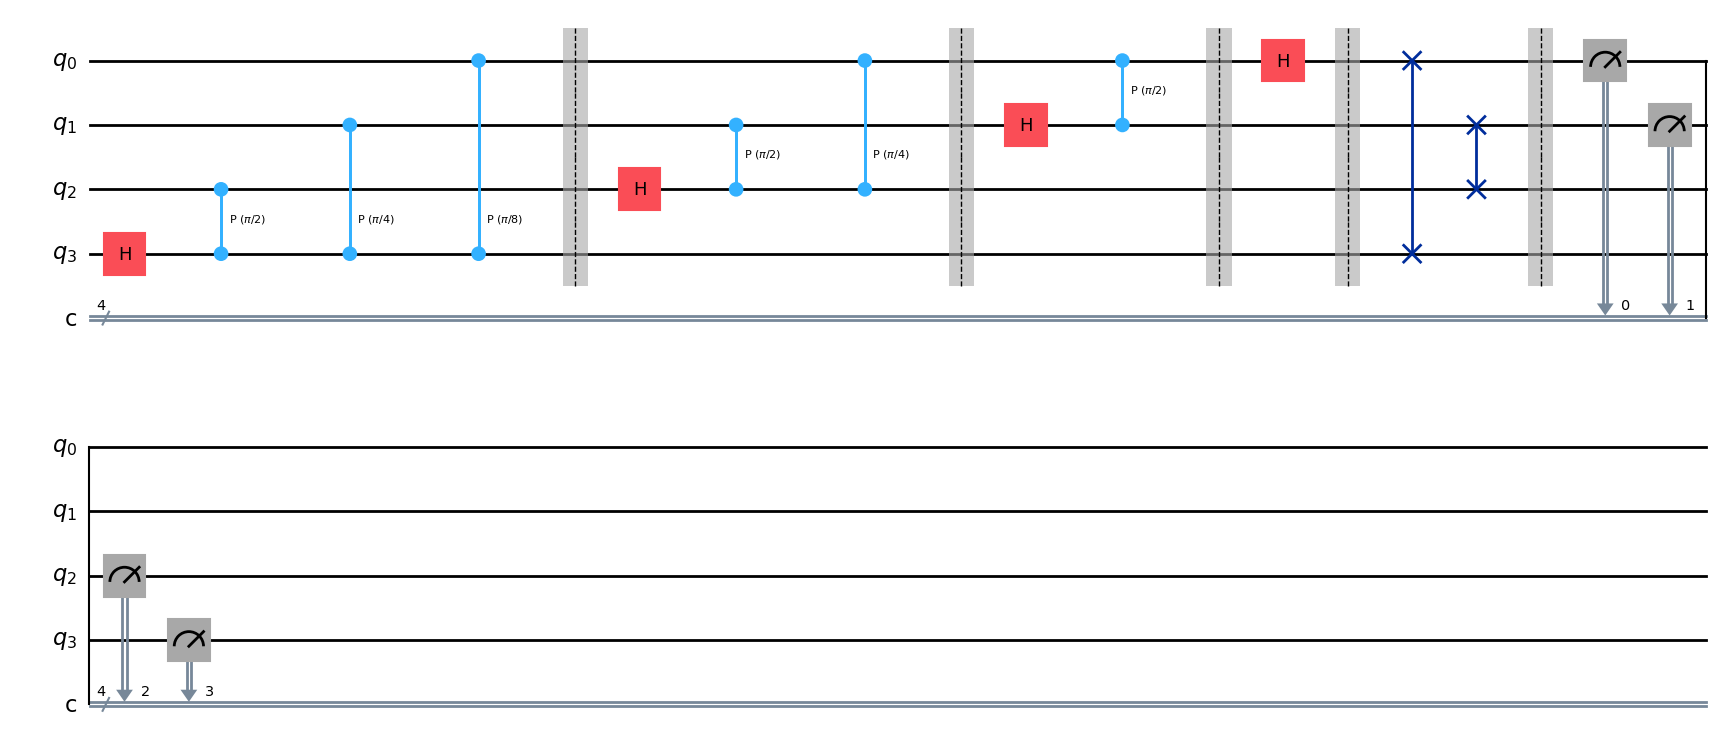

In [2]:
def QuantumFourierTransform(num_qubits, measure=False):
    # num_qubits: The number of qubits specified for the quantum circuit.
    # Define quantum and classical circuits.
    # Classical circuits are mostly used for storing measurement results of quantum circuits.
    
    quantum_register = QuantumRegister(num_qubits, name='q')
    classical_register = ClassicalRegister(num_qubits, name='c')
    circuit = QuantumCircuit(quantum_register, classical_register)

    for qubit in range(num_qubits-1, -1, -1):
        circuit.h(qubit)
        
        # Iterate over all qubits from this qubit to zero.
        for p in range(qubit-1, -1, -1):
            exponent = 2**(qubit-p)
            
            circuit.cp(np.pi/exponent, p, qubit)

        circuit.barrier()

    # Add swap gates to reset qubit sequence
    for qubit in range(floor(num_qubits/2)):
        circuit.swap(qubit, num_qubits-qubit-1)
        
    circuit.barrier()

    if measure:
        circuit.measure(quantum_register, classical_register)
    return circuit

# Run and draw circuit for visualization
num_qubits = 4
circuit_vis = QuantumFourierTransform(num_qubits, measure=True)
circuit_vis.draw('mpl')

### Verify our implementation with QFT library version.
#### Input State:

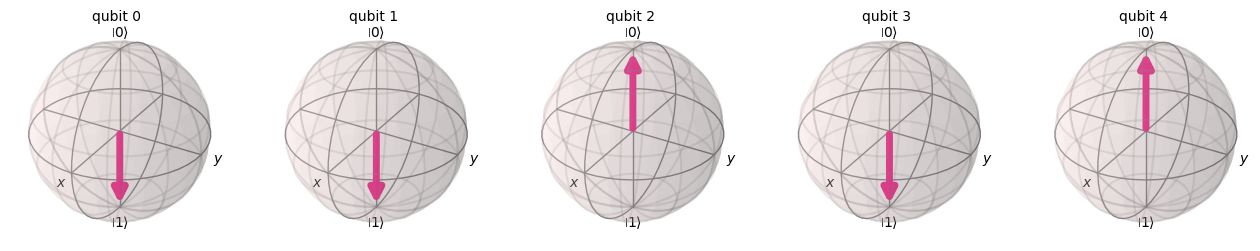

In [3]:
# Apply both versions of QFT on input state: 01011

ket0 = quantum_info.Statevector([1, 0])
ket1 = quantum_info.Statevector([0, 1])

input_state = quantum_info.Statevector(ket0^ket1^ket0^ket1^ket1)

# Draw input state on bloch sphere for visualization
input_state.draw('bloch')

#### Run the same input state on our circuit & library implementation.

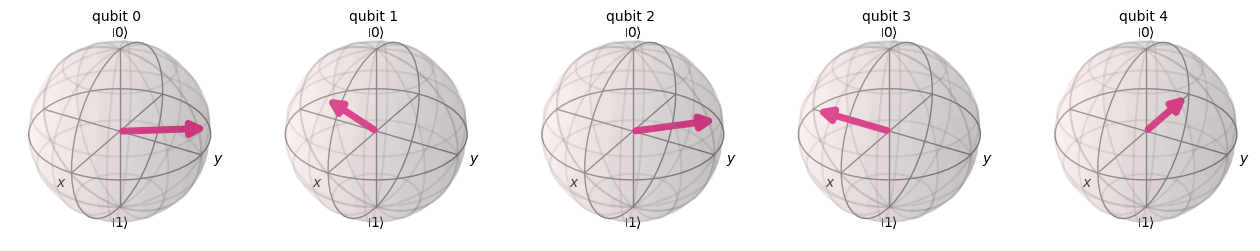

In [4]:
# Output of qft library
qft_circuit_lib = QFT(5)
output_lib = input_state.evolve(qft_circuit_lib)
output_lib.draw('bloch')

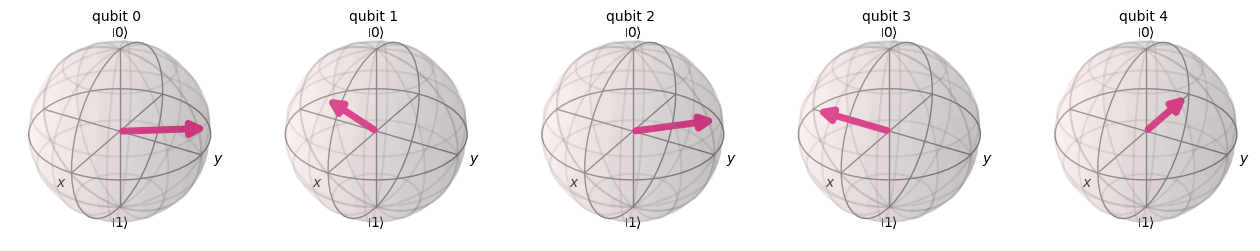

In [5]:
# Output of our implementation
qft_circuit = QuantumFourierTransform(5)
output_circuit = input_state.evolve(qft_circuit)
output_circuit.draw('bloch')

As we see the outputs of both implementations are exactly same on bloch sphere visualization, that means our implementation is verified.